In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

# Dataset Description

## `ads_data.csv` – Interaction data with advertisements:

- **date** – The date of interaction.
- **time** – The time of interaction.
- **event** – Type of action (view/click).
- **platform** – Platform of interaction.
- **ad_id** – Advertisement ID.
- **client_union_id** – Advertising account ID.
- **campaign_union_id** – Advertising campaign ID.
- **ad_cost_type** – Payment type.
- **ad_cost** – Cost of the advertisement.
- **has_video** – Indicates if the advertisement contains a video.
- **target_audience_count** – Size of the target audience.

## `ads_clients_data.csv` – Advertising client characteristics:

- **date** – The date of data entry.
- **client_union_id** – Advertising account ID.
- **community_id** – Community ID.
- **create_date** – Creation date of the advertising client.

# Task 1: Calculating the Average Number of Different Ad Events (Views and Clicks) per Advertisement

## To begin, calculate the average number of different advertising events (views and clicks) per ad. A key point to note: some ads may have impressions but no clicks. When grouping, rows without clicks will be missing, but they need to be included to accurately calculate the average per ad. Round your answers to whole numbers.

In [3]:
ads_data = pd.read_csv('D:/курс_архив/my_files/shared/homeworks/python_ds_miniprojects/6/ads_data.csv')

In [4]:
ads_data 

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [5]:
ads_clients_data = pd.read_csv('D:/курс_архив/my_files/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv')

In [6]:
ads_clients_data= ads_clients_data.drop('date', axis=1)

In [7]:
ads_clients_data

,client_union_id,community_id,create_date
0,1,-130371893,2018-12-24
1,2,-130304626,2019-02-10
2,3,-130462599,2019-01-25
3,4,-130574300,2018-12-09
4,5,-130292358,2019-01-08
...,...,...,...
122073,122074,-130470790,2018-12-21
122074,122075,-130911261,2018-11-09
122075,122076,-130494912,2018-10-27
122076,122077,-130910585,2018-12-05


In [8]:
# Filtering Events for Ad Impressions (event == "view")
views = ads_data.query('event == "view"') \
    .groupby('ad_id', as_index=False) \
    .agg({'event': 'count'})
views
# Here, we select all rows corresponding to ad impressions, then group the data by 'ad_id' (Ad ID).  
# For each ad, count the number of impressions.

,ad_id,event
0,2,101
1,3,184
2,1902,41
3,2064,35
4,2132,58
...,...,...
951,122004,100
952,122013,156
953,122023,68
954,122031,138


In [9]:
# Summing Up Total Impressions
views.event.sum()
# Calculate the total number of impressions for all ads combined.

np.int64(890822)

In [10]:
# 3. Filtering Events for Ad Clicks (event == "click")
clicks = ads_data.query('event == "click"') \
    .groupby('ad_id', as_index=False) \
    .agg({'event': 'count'})
clicks
# Similarly to the previous step, filter rows where the event is a click.  
# Group the data by 'ad_id' and count the number of clicks for each ad.

,ad_id,event
0,2,1
1,3,3
2,1902,1
3,2132,1
4,2494,1
...,...,...
520,121893,2
521,121896,1
522,121964,5
523,122004,4


In [11]:
# Summing Up Total Clicks
clicks.event.sum()
# Calculate the total number of clicks across all ads.

np.int64(109178)

In [12]:
# Counting Total Unique Ads
ad_id_count = ads_data.ad_id.nunique()
# Count the total number of unique ads in the dataset using `nunique`.
ad_id_count

965

In [13]:
# Calculating Average Views per Ad
(views.event.sum() / ad_id_count).round(0)
# Divide the total number of views by the total number of unique ads.  
# Round the result to the nearest whole number.

np.float64(923.0)

In [14]:
# Calculating Average Clicks per Ad
(clicks.event.sum() / ad_id_count).round(0)
# Similarly, divide the total number of clicks by the total number of unique ads.  
# Round the result to the nearest whole number.

np.float64(113.0)

# Average number of clicks per ad: 113
# Average number of views per ad: 923

# Task 2 "Let's examine the distribution of ad views!"

## On the x-axis – number of views
## On the y-axis – share of ads with that number of views
### Log-transform the number of views and then plot such a graph that makes the distribution shape clear.

In [15]:
views['log_event'] = np.log(views.event)

In [16]:
views

,ad_id,event,log_event
0,2,101,4.615121
1,3,184,5.214936
2,1902,41,3.713572
3,2064,35,3.555348
4,2132,58,4.060443
...,...,...,...
951,122004,100,4.605170
952,122013,156,5.049856
953,122023,68,4.219508
954,122031,138,4.927254


C:\Users\bedzh\AppData\Local\Temp\ipykernel_5336\4262686165.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(views.log_event)


<Axes: xlabel='log_event', ylabel='Density'>

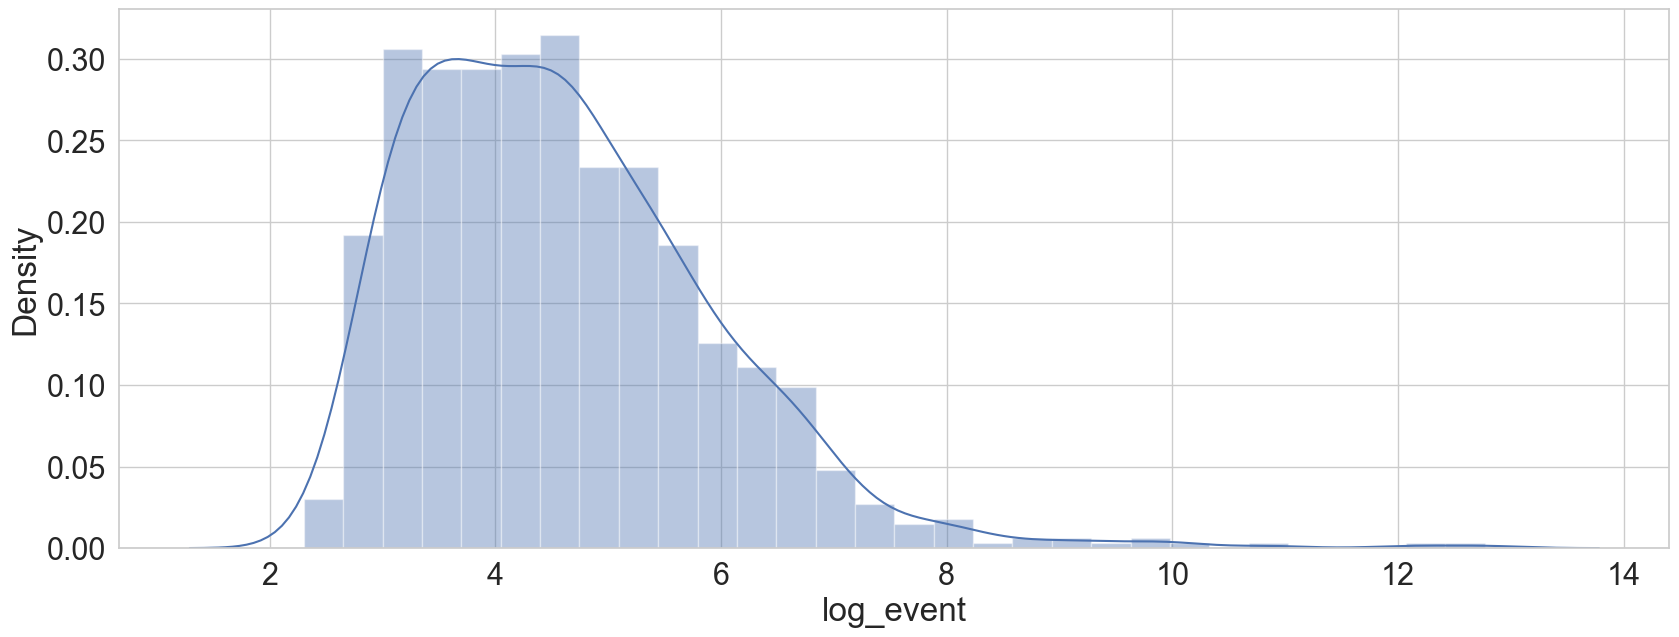

In [17]:
sns.distplot(views.log_event)

# Task 4
## Now we need to find the average number of views per ad (ad_id) by day, excluding ads with no views (simple average). After that, calculate the moving average on the resulting values with a window of 2 elements.

### Question: What is the moving average value for April 6, 2019? Round the answer to the nearest whole number.

In [18]:
# First, let's check the data type of the 'date' column.
ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [19]:
# Convert the 'date' column to a datetime format.
ads_data['date'] = pd.to_datetime(ads_data.date)

In [20]:
ads_data.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [21]:
# Filter the data to keep only the "view" events.
# Group the data by ad and date, counting the number of views for each ad on a specific day.
daily_views_per_ad = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'event': 'count'})
daily_views_per_ad

,ad_id,date,event
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [22]:
# Group by date and calculate the average number of views per ad for each day.
daily_avg_views = daily_views_per_ad.groupby('date') \
    .agg({'event': 'mean'}) \
    .rolling(2).mean().round(0)
# Calculate the moving average with a window of 2 elements, rounding the result to the nearest integer.

In [23]:
# Display the moving average result.
daily_avg_views

,event
date,
2019-04-01,NaN
2019-04-02,146.0
2019-04-03,151.0
2019-04-04,420.0
2019-04-05,798.0
2019-04-06,598.0


# Answear: 2019-04-06 = 598.0

# Task 5: "Moving averages are often used to find anomalies in data. Let's try to plot both the simple moving average and the regular average number of views per day on the same graph."

## Calculate the day with the largest absolute difference between the arithmetic mean and the moving average. Exclude the days where the moving average is NaN. Write the answer in the format yyyy-MM-dd.

In [24]:
# Group the data by date and calculate the average number of views per ad for each day.
daily_average_views = daily_views_per_ad.groupby('date') \
    .agg({'event': 'mean'}).reset_index()
# The `reset_index()` method resets the index so that the date becomes a separate column.
daily_average_views

,date,event
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [25]:
# Reset the index again and remove rows with NaN values (if any).
daily_avg_views.reset_index().dropna()
# Reset the index one more time and remove rows with missing values using the `dropna()` method.

,date,event
1,2019-04-02,146.0
2,2019-04-03,151.0
3,2019-04-04,420.0
4,2019-04-05,798.0
5,2019-04-06,598.0


In [26]:
# Combine the two tables `daily_average_views` and `daily_avg_views` by date.
daily_average_views = daily_average_views.merge(daily_avg_views, how='inner', on='date')
# Join the data based on the common column `date`. Use an 'inner' join to keep only the shared dates.
daily_average_views

,date,event_x,event_y
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


In [27]:
# Reset the index and remove rows with NaN values again.
daily_average_views = daily_average_views.reset_index().dropna()

In [28]:
# Check the result of the merge and data cleaning.
daily_average_views

,index,date,event_x,event_y
1,1,2019-04-02,137.786982,146.0
2,2,2019-04-03,163.952778,151.0
3,3,2019-04-04,675.901720,420.0
4,4,2019-04-05,919.109677,798.0
5,5,2019-04-06,277.122727,598.0


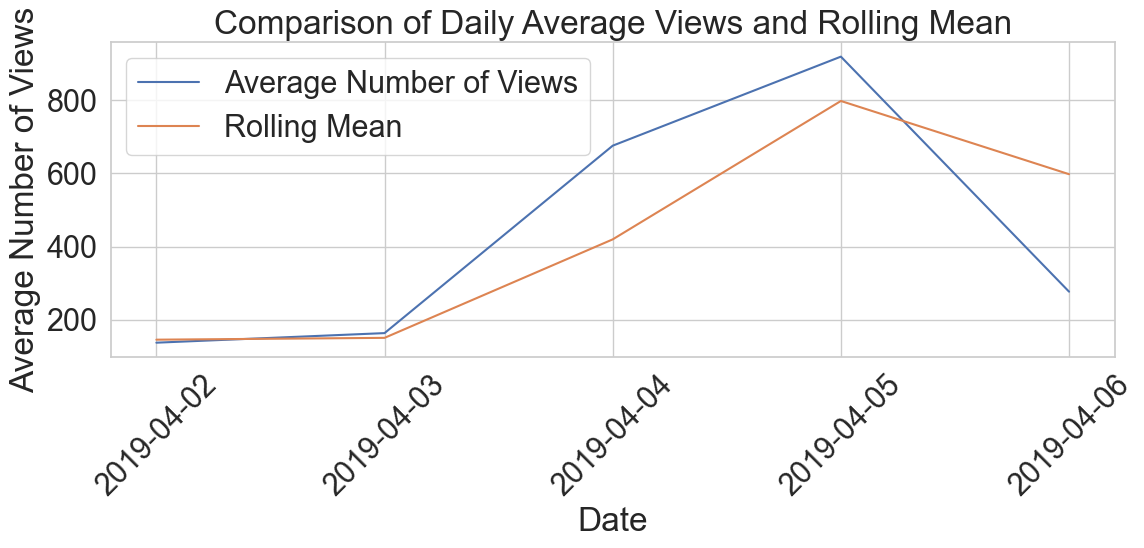

In [29]:
# Plot the comparison of the arithmetic mean and rolling mean
plt.figure(figsize=(12, 6))

# Line for the arithmetic mean by day
sns.lineplot(data=daily_average_views, x="date", y="event_x", label='Average Number of Views')

# Line for the rolling mean
sns.lineplot(data=daily_average_views, x="date", y="event_y", label='Rolling Mean')

# Adjust the format for the X-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as 'yyyy-MM-dd'

# Set the step for the X-axis to improve readability
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Display each date (interval can be adjusted)

# Customize the appearance of the plot
plt.title('Comparison of Daily Average Views and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Average Number of Views')
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.grid(True)
plt.legend()

plt.tight_layout()  # Prevent overlapping of elements
plt.show()


# Answer: The greatest absolute difference between the arithmetic mean and the moving average occurs on 2019-04-06

# Task 6
## Merge the advertisement data with the advertising client data and calculate the average number of days 
## from the client's creation date (create_date) to the first ad launch by the client (date).

### Provide the average number of days as the answer.

In [30]:
# Merging the advertisement data with the advertising client data by the common column 'client_union_id'
all_frame = ads_data.merge(ads_clients_data, on='client_union_id', how='inner')
## We use 'inner' join to keep only those rows that exist in both tables (clients and ads).

In [31]:
# Checking the result of the merge
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19


In [32]:
# Converting the 'date' (ad launch date) and 'create_date' (client creation date) columns to datetime format
all_frame['date'] = pd.to_datetime(all_frame['date'])
all_frame['create_date'] = pd.to_datetime(all_frame['create_date'])
## Converting date strings to datetime format so that they can be worked with as dates (for example, subtraction).

In [33]:
# Checking the data types after conversion
all_frame.dtypes # Verifying that the 'date' and 'create_date' columns are of datetime type

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [34]:
# Calculating the difference between the client creation date and the ad launch date for each ad
all_frame['difference'] = all_frame.date - all_frame.create_date
## Adding a new column 'difference' that stores the number of days between the client creation date and the first ad launch.
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date,difference
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22,38 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19,168 days


In [35]:
# Grouping Data by Clients (`client_union_id`) and Calculating Average Days to First Ad Launch
# This represents the date of the first ad launch for each client.
all_frame.groupby('client_union_id') \
    .agg({'difference': 'min'}) \
    .mean()
# Compute the mean of the minimum `difference` values across all clients.  
# The average days show the typical time taken by clients to launch their first ad after account creation.

difference   124 days 09:04:43.532219570
dtype: timedelta64[ns]

# Output of the average number of days from account creation: 124 days

# Task 7
## Let's calculate the conversion from the creation of the advertising account to the launch of the first ad within no more than 365 days.
### Provide the answer in percentages and round to two decimal places.

In [36]:
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date,difference
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25,97 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13,139 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18,226 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22,38 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19,168 days


In [37]:
# Select data for clients who launched their first ad within 365 days of account creation
dataframe = all_frame.query('difference < "365d"') \
    .groupby("client_union_id", as_index=False) \
    .agg({'difference': 'count'})
# Use the query method to filter rows where the difference between the account creation date and the first ad launch is less than 365 days.
# Then, group the data by 'client_union_id' (unique clients) and count the number of such records.
dataframe

,client_union_id,difference
0,1,289
1,9,42
2,13,35
3,16,59
4,20,3412
...,...,...
833,122004,104
834,122013,156
835,122023,68
836,122031,139


In [38]:
# Count the total number of unique clients in ads_clients_data (all clients who created an advertising account)
total_clients = ads_clients_data.client_union_id.nunique()
# Use the nunique() method to count the unique clients in the ads_clients_data table (all clients).
total_clients

122078

In [39]:
# Count the total number of unique clients in 'ads_data' who launched advertisements
clients_with_ads = ads_data.client_union_id.nunique()
clients_with_ads

838

In [40]:
# Calculate the conversion: the ratio of clients who launched advertisements to the total number of clients
conversion_rate = (clients_with_ads / total_clients) * 100
conversion_rate_rounded = round(conversion_rate, 2)
# Compute the percentage of clients who launched advertisements within 365 days out of the total number of clients. 
# Round the conversion to two decimal places and display the result.
conversion_rate_rounded

0.69

# Answear 0.69

# Task 8 
## Let's divide our clients into intervals from the creation of the advertising account to the launch of the first advertisement.

### Determine how many unique clients launched their first advertisement in the first month of their existence
### (from 0 to 30 days). The list of day intervals for the `pd.cut()` method is [0, 30, 90, 180, 365].
### You can create time intervals using `pd.to_timedelta()`.

In [41]:
dataframe.dtypes

client_union_id    int64
difference         int64
dtype: object

In [42]:
# Set intervals for dividing clients by time periods (from 0 to 30, 90, 180, and 365 days)
# Use pd.to_timedelta to create time intervals
all_frame['time_interval'] = pd.cut(all_frame['difference'], bins=pd.to_timedelta(["0 days", "30 days", "90 days", "180 days", "365 days"]),
                                                    labels= ["less than 30 days", "from 30 to 90 days", "from 90 to 180 days", "more than 180 days"])
# Apply pd.cut to divide clients into time intervals based on the 'difference' in time
# The intervals will be divided with labels for each range
all_frame

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,community_id,create_date,difference,time_interval
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,-130129582,2018-12-04,118 days,from 90 to 180 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,-130337958,2018-12-25,97 days,from 90 to 180 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,-130393498,2018-11-13,139 days,from 90 to 180 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,-130929771,2018-08-18,226 days,more than 180 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,-130021201,2019-02-22,38 days,from 30 to 90 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days,from 30 to 90 days
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days,from 30 to 90 days
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392,-130473199,2019-01-29,66 days,from 30 to 90 days
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929,-130507449,2018-10-19,168 days,from 90 to 180 days


In [43]:
# Remove duplicates based on the 'client_union_id' column to consider only unique clients
# We want to consider each client only once.
unique_clients = all_frame.drop_duplicates(subset=['client_union_id'])

In [44]:
# Count the number of clients in each time interval
# all_frame.value_counts()
clients_by_interval = unique_clients['time_interval'].value_counts()
clients_by_interval

time_interval
from 90 to 180 days    395
from 30 to 90 days     263
more than 180 days     169
less than 30 days       11
Name: count, dtype: int64

# Answer: 11 unique clients launched their first ad in the first month of their existence.

# Task 9  
## Build an interactive bar plot showing the categories with the number of unique clients in each (from the previous step, based on the launch of the first ad).  
## Arrange them so that the least numerous category is at the bottom, and the most numerous is at the top.

In [45]:
clients_by_interval = pd.DataFrame(clients_by_interval)
clients_by_interval

,count
time_interval,
from 90 to 180 days,395
from 30 to 90 days,263
more than 180 days,169
less than 30 days,11


C:\Users\bedzh\AppData\Local\Temp\ipykernel_5336\673175479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='time_interval', data=clients_by_interval, palette='viridis')


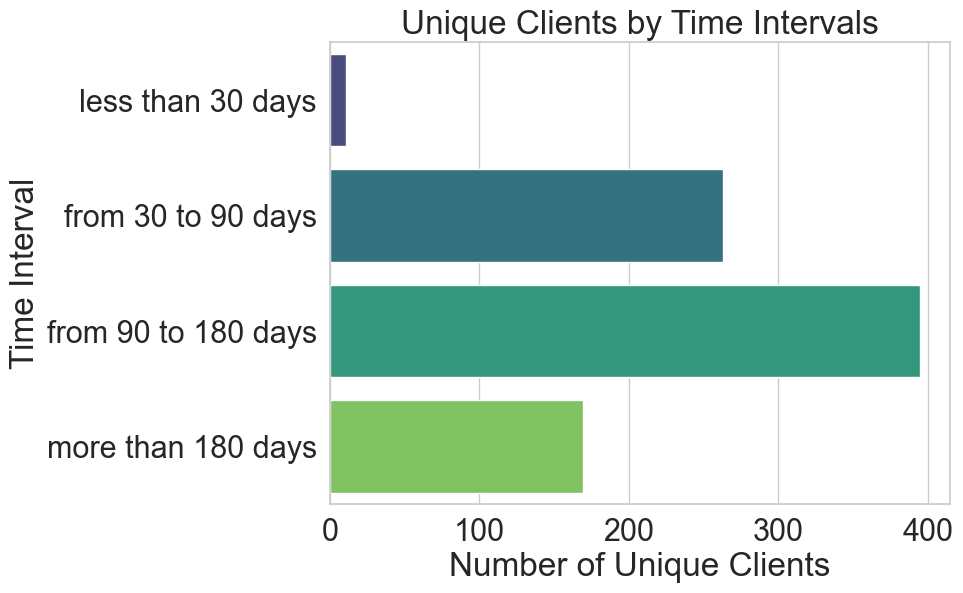

In [46]:
# Building the Chart with Seaborn
plt.figure(figsize=(8, 6))  # Setting the figure size
sns.barplot(x='count', y='time_interval', data=clients_by_interval, palette='viridis')

# Configuring the Chart
plt.title('Unique Clients by Time Intervals')
plt.xlabel('Number of Unique Clients')
plt.ylabel('Time Interval')

# Displaying the Chart
plt.show()